## 1. Import libraries

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
#NOTE: DESEQ to do differential expression analysis

## 2. Reading Cancer Datasets

### 2.1. Cancer

In [2]:
cancer_reads = pd.read_csv("./breast_cancer_recurrence_classifier/data/pnas_readcounts_96_nodup.txt", sep = "\t", header=None)
cancer_tpm = pd.read_csv("./breast_cancer_recurrence_classifier/data/pnas_tpm_96_nodup.txt", sep = "\t", header=None)
cancer_meta = pd.read_csv("./breast_cancer_recurrence_classifier/data/pnas_patient_info.csv")

### 2.2. Normal

In [3]:
normal_reads = pd.read_csv("./breast_cancer_recurrence_classifier/data/pnas_normal_readcounts.txt", sep = "\t")
normal_tpm = pd.read_csv("./breast_cancer_recurrence_classifier/data/pnas_normal_tpm.txt", sep = "\t")

### 2.3. Validation

In [4]:
validation_reads = pd.read_csv("./breast_cancer_recurrence_classifier/data/validation_exon_readcounts", sep = "\t")
validation_tpm = pd.read_csv("./breast_cancer_recurrence_classifier/data/validation_exon_tpm", sep = "\t")
validation_norm_meta = pd.read_excel("./breast_cancer_recurrence_classifier/data/validation_bc_meta.xlsx")
validation_bc_meta = pd.read_excel("./breast_cancer_recurrence_classifier/data/validation_normal_meta.xlsx")

## 3. Input features

### 3.1. Input features

#### 3.1.1. Cancer Features

In [5]:
print(cancer_reads.columns)
print(cancer_tpm.columns)
print(cancer_meta.index)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96],
           dtype='int64')
Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96],
           dtype='int64')
RangeIndex(start=0, stop=9

##### -- Data Processing: Cancer --

In [6]:
# Changing Rows into Columns, so a patient's data is represented by a row
t_cancer_reads = cancer_reads.transpose()
t_cancer_reads = t_cancer_reads.rename(columns=t_cancer_reads.iloc[0]).loc[1:]
# Removing Non-Genetic Data
t_cancer_reads = t_cancer_reads.iloc[ : , 0:-5]
t_cancer_reads

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283098,ENSG00000283101,ENSG00000283103,ENSG00000283108,ENSG00000283110,ENSG00000283117,ENSG00000283118,ENSG00000283122,ENSG00000283123,ENSG00000283125
1,3,2,0,4,19,3,25,5,10,4,...,2,0,1,0,0,2,1,7,0,1
2,18,5,0,1,14,1,12,0,3,12,...,1,0,0,3,0,2,0,1,0,0
3,19,7,2,6,24,2,8,3,10,4,...,0,0,0,1,0,3,0,3,0,0
4,13,1,1,4,6,0,18,5,8,3,...,2,0,0,3,0,4,0,2,0,0
5,9,7,2,9,7,0,39,2,38,0,...,0,0,0,2,0,5,3,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0,0,12,32,1,0,4,0,1,8,...,0,0,0,0,0,0,0,6,9,0
93,18,1,2,13,17,5,30,0,14,11,...,0,0,0,0,0,2,3,5,0,2
94,7,1,0,2,1,0,18,0,16,15,...,0,0,0,0,0,14,0,4,1,0
95,21,35,0,9,2,3,12,4,17,19,...,1,0,0,0,0,0,15,14,0,0


In [7]:
# Changing Rows into Columns, so a patient's data is represented by a row
t_cancer_tpm = cancer_tpm.transpose()
t_cancer_tpm = t_cancer_tpm.rename(columns=t_cancer_tpm.iloc[0]).loc[1:]
# Removing Non-Genetic Data
t_cancer_tpm

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283098,ENSG00000283101,ENSG00000283103,ENSG00000283108,ENSG00000283110,ENSG00000283117,ENSG00000283118,ENSG00000283122,ENSG00000283123,ENSG00000283125
1,7.071605,13.279391,0.0,6.212355,34.038592,9.231355,32.811263,19.136966,12.631348,11.220057,...,12.308474,0.0,4.430132,0.0,0.0,6.856902,16.599238,22.357146,0.0,19.542796
2,60.610797,47.42408,0.0,2.21859,35.828348,4.395669,22.498053,0.0,5.41317,48.083612,...,8.791338,0.0,0.0,48.996429,0.0,9.795095,0.0,4.56246,0.0,0.0
3,58.255903,60.455497,23.040206,12.120963,55.926653,8.005046,13.657227,14.9353,16.430065,14.594347,...,0.0,0.0,0.0,14.871406,0.0,13.378542,0.0,12.463189,0.0,0.0
4,29.917356,6.482332,8.64669,6.06512,10.494273,0.0,23.064209,18.683413,9.865584,8.215603,...,12.016758,0.0,0.0,33.486271,0.0,13.388781,0.0,6.236364,0.0,0.0
5,24.500322,53.675826,20.456404,16.142519,14.482668,0.0,59.112604,8.840272,55.432674,0.0,...,0.0,0.0,0.0,26.407358,0.0,19.797049,57.509813,3.688509,0.0,45.13872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.0,0.0,179.178412,83.788404,3.020339,0.0,8.850761,0.0,2.129548,37.8323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.30779,335.126565,0.0
93,38.189128,5.976111,15.942897,18.172309,27.411791,13.847925,35.438448,0.0,15.916524,27.771431,...,0.0,0.0,0.0,0.0,0.0,6.171609,44.820832,14.373377,0.0,35.1793
94,15.608352,6.280734,0.0,2.938248,1.694651,0.0,22.346922,0.0,19.117537,39.800507,...,0.0,0.0,0.0,0.0,0.0,45.403383,0.0,12.084831,20.892525,0.0
95,51.519267,241.863225,0.0,14.547636,3.729079,9.607693,16.391467,15.933703,22.348699,55.467977,...,6.405129,0.0,0.0,0.0,0.0,0.0,259.13917,46.537173,0.0,0.0


#### 3.1.2. Normal Features

In [8]:
print(normal_reads.columns)
print(normal_tpm.columns)

Index(['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N11',
       'N12', 'N13', 'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21',
       'N22', 'N23', 'N24', 'N25', 'N26', 'N27', 'N28', 'N29', 'N30', 'N31',
       'N32'],
      dtype='object')
Index(['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N11',
       'N12', 'N13', 'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21',
       'N22', 'N23', 'N24', 'N25', 'N26', 'N27', 'N28', 'N29', 'N30', 'N31',
       'N32'],
      dtype='object')


##### -- Data Processing: Normal --

In [9]:
# Changing Rows into Columns, so a patient's data is represented by a row
t_normal_reads = normal_reads.transpose()
# Removing Non-Genetic Data
t_normal_reads = t_normal_reads.iloc[ : , 0:-5]
t_normal_reads

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283098,ENSG00000283101,ENSG00000283103,ENSG00000283108,ENSG00000283110,ENSG00000283117,ENSG00000283118,ENSG00000283122,ENSG00000283123,ENSG00000283125
N1,15,5,10,7,6,7,21,3,16,3,...,3,0,1,0,0,0,1,6,0,0
N2,9,1,0,5,14,1,4,2,9,7,...,0,0,1,12,0,0,0,8,0,0
N3,0,1,1,9,0,5,0,0,16,0,...,0,0,0,0,0,7,0,0,0,8
N4,24,0,0,8,8,4,0,0,2,2,...,0,0,0,0,0,0,3,14,0,2
N5,8,0,2,12,6,0,14,0,0,3,...,13,0,0,0,0,5,1,4,0,2
N6,0,2,1,4,1,2,14,9,11,10,...,2,0,0,0,0,0,0,7,0,3
N7,1,0,0,18,0,7,1,0,0,0,...,0,0,0,1,0,0,0,0,0,11
N8,18,2,0,0,8,3,10,7,10,0,...,0,0,0,0,0,0,0,1,0,0
N9,9,3,0,2,8,3,17,1,3,3,...,0,0,0,0,0,0,1,2,0,0
N10,11,0,0,13,13,2,10,3,4,1,...,0,0,0,0,0,1,0,0,0,0


In [10]:
# Changing Rows into Columns, so a patient's data is represented by a row
t_normal_tpm = normal_tpm.transpose()
# Removing Non-Genetic Data
t_normal_tpm


,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283098,ENSG00000283101,ENSG00000283103,ENSG00000283108,ENSG00000283110,ENSG00000283117,ENSG00000283118,ENSG00000283122,ENSG00000283123,ENSG00000283125
N1,26.432148,24.817762,66.208114,8.127159,8.035515,16.102255,20.603770,8.583587,15.108249,6.290726,...,13.801933,0.0,3.311778,0.000000,0.0,0.000000,12.408881,14.325640,0.000000,0.000000
N2,17.260895,5.402219,0.000000,6.318156,20.406574,2.503619,4.271368,6.228123,9.249458,15.975601,...,0.000000,0.0,3.604465,111.626610,0.0,0.000000,0.000000,20.788941,0.000000,0.000000
N3,0.000000,7.557640,10.081027,15.910242,0.000000,17.512665,0.000000,0.000000,23.004230,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,27.317062,0.000000,0.000000,0.000000,177.956852
N4,69.795165,0.000000,0.000000,15.328639,17.681754,15.185237,0.000000,0.000000,3.116715,6.921217,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,61.436544,55.165012,0.000000,48.220761
N5,19.331552,0.000000,18.158365,19.105460,11.019179,0.000000,18.836099,0.000000,0.000000,8.626534,...,82.015806,0.0,0.000000,0.000000,0.0,17.573081,17.016418,13.096592,0.000000,40.067910
N6,0.000000,14.330953,9.557926,6.704296,1.933370,6.641576,19.829323,37.174275,14.994752,30.271364,...,13.283151,0.0,0.000000,0.000000,0.0,0.000000,0.000000,24.127552,0.000000,63.271025
N7,2.928341,0.000000,0.000000,34.729107,0.000000,26.758829,1.630451,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,14.203235,0.0,0.000000,0.000000,0.000000,0.000000,267.057171
N8,53.467303,16.733900,0.000000,0.000000,18.060385,11.632806,16.538723,33.761378,15.917275,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,4.024736,0.000000,0.000000
N9,14.997727,14.081717,0.000000,2.195899,10.131976,6.526069,15.773136,2.705760,2.678904,5.948980,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,11.734764,4.515798,0.000000,0.000000
N10,25.816814,0.000000,0.000000,20.102628,23.188602,6.127558,13.067610,11.432404,5.030636,2.792854,...,0.000000,0.0,0.000000,0.000000,0.0,3.413588,0.000000,0.000000,0.000000,0.000000


#### 3.1.3. Validation Features

In [11]:
print(validation_reads.columns)
print(validation_tpm.columns)
print(validation_norm_meta.columns)
print(validation_bc_meta.columns)

Index(['BCSC_S5_01', 'BCSC_S5_02', 'BCSC_S5_03', 'BCSC_S5_04', 'BCSC_S5_05',
       'BCSC_S5_06', 'BCSC_S5_07', 'BCSC_S5_08', 'BCSC_S5_09', 'BCSC_S5_10',
       ...
       'BCSC_S6_66', 'BCSC_S6_67', 'BCSC_S6_68', 'BCSC_S6_69', 'BCSC_S6_70',
       'BCSC_S6_71', 'BCSC_S6_72', 'BCSC_S6_73', 'BCSC_S6_74', 'BCSC_S6_75'],
      dtype='object', length=161)
Index(['BCSC_S5_01', 'BCSC_S5_02', 'BCSC_S5_03', 'BCSC_S5_04', 'BCSC_S5_05',
       'BCSC_S5_06', 'BCSC_S5_07', 'BCSC_S5_08', 'BCSC_S5_09', 'BCSC_S5_10',
       ...
       'BCSC_S6_66', 'BCSC_S6_67', 'BCSC_S6_68', 'BCSC_S6_69', 'BCSC_S6_70',
       'BCSC_S6_71', 'BCSC_S6_72', 'BCSC_S6_73', 'BCSC_S6_74', 'BCSC_S6_75'],
      dtype='object', length=161)
Index(['Mapping ID', 'Age at Sample collection', 'Gender',
       'Recurrence Staus at the time of collection'],
      dtype='object')
Index(['Mapping ID', 'Gender (M/F)', 'Age (in years)'], dtype='object')


## 4. Glimpse of the data

### 4.1. Input features

In [12]:
cancer_concat = pd.concat([t_cancer_reads, t_cancer_tpm], axis=1)
cancer_concat['cancer_status'] = 1
normal_concat = pd.concat([t_normal_reads, t_normal_tpm], axis=1)
normal_concat['cancer_status'] = 0

In [13]:
print(cancer_concat.shape)
print(normal_concat.shape)

(96, 121351)
(32, 121351)


In [14]:
final_concat = pd.concat([cancer_concat, normal_concat], axis=0)

### 4.2. Assigning *input* and *output* variables

In [15]:
X = pd.concat([cancer_concat.iloc[0:16 , 0:-1], normal_concat.iloc[0:16 , 0:-1]], axis = 0).to_numpy()
Y = pd.concat([cancer_concat.iloc[0:16 , -1:], normal_concat.iloc[0:16 , -1:]], axis = 0).values

### 4.3. Let's examine the data dimension

In [16]:
X.shape

(32, 121350)

In [17]:
New_Y = list()

for y in Y:
    New_Y.append(y[0])

Y.shape

(32, 1)

## 5. Build Classification Model using Random Forest

In [18]:
clf = RandomForestClassifier()

In [19]:
clf.fit(X, New_Y)

RandomForestClassifier()

## 6. Feature Importance

In [20]:
sorted(clf.feature_importances_, reverse=True)

[0.018814814814814812,
 0.017777777777777778,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.008823529411764706,
 0.008823529411764706,
 0.008823529411764706,
 0.008814814814814814,
 0.008814814814814814,
 0.008814814814814814,
 0.008814814814814814,
 0.008814814814814814,
 0.008814814814814814,
 0.008796992481203008,
 0.008796992481203008,
 0.008796992481203008,
 0.008796992481203008,
 0.007785467128027682,
 0.007785467128027682,
 0.007785467128027682,
 0.007785467128027682,
 0.007785467128027682,
 0.007785467128027682,
 0.0077777777777777776,
 0.0077777777777777776,
 0.0077777777777777776,
 0.0077777777777777776,
 0.0077777777777777776,
 0.0077777777777777776,
 0.0077777777777777776,
 0.0077777777777777776,
 0.007754385964912281,
 0.007754385964912281,
 0.00775438596491228,
 0.00775438596491228,
 0.00775438596491228,
 0.0077142857142857135,
 0.00765625,
 0.007655677655677656,
 0.007655677655677656,
 0.007655677655677656,
 0.007655677655677656,


## 7. Make Prediction: *Cancer / No Cancer*

In [21]:
print(clf.predict(normal_concat.iloc[17: , 0:-1].values))

[1 0 1 0 1 0 0 1 1 0 1 0 0 0 1]


In [22]:
print(clf.predict(cancer_concat.iloc[17: , 0:-1].values))

[1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1
 0 1 1 0 1]


---
---

## 8. Cancer Recurence Dataset

In [23]:
cancer_meta

,poiseid,fu,Final.Library.Conc..nM.,Final.Library.Conc..ng.ul.,sample.name.in.MiniSeq,sample_id,On.Plate,readcount,avglength,uniquely_mapped_reads,...,cancertype,cancerstage_cat,er_cat,pr_cat,her2_cat,chemo,datechemostart,datechemoend,daterecurrence,recurStatus
0,2006,2,81.01,15.83,ZZ-20170524-Cellfree-10-01,S01_B14,A1,435826,75,370649,...,Ductal,3,0,0,0,AC/T,31/12/2008,08/04/2009,29/06/2009,R
1,2006,3,35.99,7.03,ZZ-20170524-Cellfree-10-02,S02_B14,A2,563731,75,481372,...,Ductal,3,0,0,0,AC/T,31/12/2008,08/04/2009,29/06/2009,R
2,2010,3,70.89,13.85,ZZ-20170524-Cellfree-10-03,S03_B14,A3,457102,74,399462,...,Ductal,2,0,0,0,AC/T,07/01/2009,20/05/2009,09/11/2010,R
3,2010,4,114.20,22.31,ZZ-20170524-Cellfree-10-04,S04_B14,A4,638280,75,562452,...,Ductal,2,0,0,0,AC/T,07/01/2009,20/05/2009,09/11/2010,R
4,2011,2,108.95,21.28,ZZ-20170524-Cellfree-10-05,S05_B14,A5,434579,75,382854,...,Ductal,3,1,1,0,AC/T,12/01/2009,27/04/2009,22/12/2010,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2005,3,14.16,2.77,ZZ-20170524-Cellfree-10-92,S92_B14,H8,351558,74,297278,...,Ductal,2,1,1,0,TC,12/11/2008,14/01/2009,01/03/2025,N
92,2003,2,114.52,22.37,ZZ-20170524-Cellfree-10-93,S93_B14,H9,446446,75,397125,...,Ductal,2,1,1,0,AC/T,24/10/2008,12/02/2009,01/03/2025,N
93,2003,3,67.67,13.22,ZZ-20170524-Cellfree-10-94,S94_B14,H10,367318,75,324069,...,Ductal,2,1,1,0,AC/T,24/10/2008,12/02/2009,01/03/2025,N
94,2002,2,38.65,7.55,ZZ-20170524-Cellfree-10-95,S95_B14,H11,363729,75,319003,...,Ductal,3,1,1,1,AC/T,13/10/2008,19/01/2009,01/03/2025,N


### 8.1 Training By Hand

In [24]:
from datetime import datetime

def calculate_days(date1, date2):
    date_format = "%d/%m/%Y"

    try:
        # Convert the input strings to datetime objects
        dt1 = datetime.strptime(date1, date_format)
        dt2 = datetime.strptime(date2, date_format)

        # Calculate the time difference
        time_diff = dt2 - dt1

        # Extract the number of days from the time difference
        days_passed = time_diff.days

        return days_passed

    except ValueError:
        return "Invalid date format. Please use the day/month/year format (e.g., 01/01/2022)."


In [25]:
cancer_length = []
NcancerType = []
NrecurStatus = []

new_meta = pd.DataFrame()

for x in ["cancerstage_cat"]:
    new_meta[x] = cancer_meta[x]

for x in zip(cancer_meta["datechemostart"], cancer_meta["datechemoend"]):
    cancer_length.append(calculate_days(x[0], x[1]))

for x in cancer_meta["cancertype"]: 
    NcancerType.append(list(cancer_meta["cancertype"].unique()).index(x))

for x in cancer_meta["recurStatus"]: 
    NrecurStatus.append(list(cancer_meta["recurStatus"].unique()).index(x))

new_meta["treatment_length"] = cancer_length
new_meta["NcancerType"] = NcancerType
new_meta["NrecurStatus"] = NrecurStatus
new_meta.index = np.arange(1,len(new_meta)+1)
new_meta

,cancerstage_cat,treatment_length,NcancerType,NrecurStatus
1,3,98,0,0
2,3,98,0,0
3,2,133,0,0
4,2,133,0,0
5,3,105,0,0
...,...,...,...,...
92,2,63,0,1
93,2,111,0,1
94,2,111,0,1
95,3,98,0,1


In [26]:
cancer_concat2 = pd.concat([cancer_concat, new_meta], axis=1)
cancer_recurse = cancer_concat2[cancer_concat2["NrecurStatus"] == 0]
cancer_norecurse = cancer_concat2[cancer_concat2["NrecurStatus"] == 1]

In [27]:
cancer_recurse.shape, cancer_norecurse.shape

((28, 121355), (68, 121355))

In [28]:
X_train = pd.concat([cancer_recurse.iloc[1:24, 0:-1], cancer_norecurse.iloc[1:24, 0:-1]], axis=0)
Y_train = pd.concat([cancer_recurse.iloc[1:24, -1:], cancer_norecurse.iloc[1:24, -1:]], axis=0)

New_Y = list()

for y in Y_train.values:
    New_Y.append(y[0])

X_train.shape, cancer_recurse.shape

((46, 121354), (28, 121355))

### 8.2 Using *train_test_split()* Function

In [29]:
all_Y = pd.concat([cancer_recurse.iloc[:, -1:], cancer_norecurse.iloc[:, -1:]], axis=0)
all_X = pd.concat([cancer_recurse.iloc[:, 0:-1], cancer_norecurse.iloc[:, 0:-1]], axis=0)

X_train, X_test, y_train, y_test = train_test_split(all_X, all_Y, test_size=0.40, random_state=42)

New_Y = list()

for y in y_train.values:
    New_Y.append(y[0])


In [30]:
rf = RandomForestClassifier()
rf.fit(X_train, New_Y)
# cross_val_score(clf, X_train, New_Y, cv=5)

RandomForestClassifier()

In [31]:
rf.estimators_[1]


DecisionTreeClassifier(max_features='auto', random_state=1214182986)

In [39]:
from sklearn.tree import export_graphviz
from sklearn.model_selection import RandomizedSearchCV
from IPython.display import Image
import graphviz
from random import randint

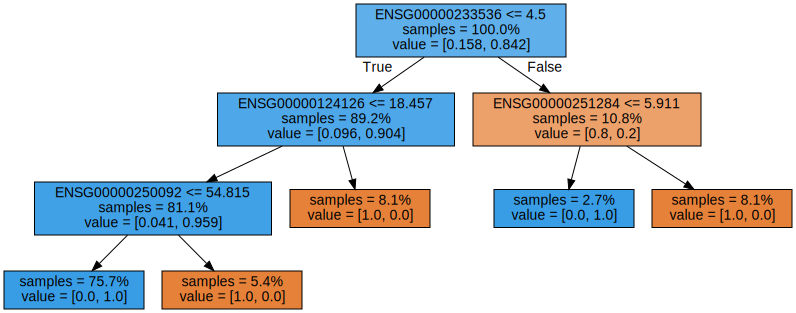

In [37]:
for i in range(1):
    tree = rf.estimators_[99]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=5, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [45]:
param_dist = {'n_estimators': [20,50,100,200],
              'max_depth': [2, 5, 7, 10, 15, 20]}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, New_Y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [2, 5, 7, 10, 15, 20],
                                        'n_estimators': [20, 50, 100, 200]})

In [46]:
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'n_estimators': 50, 'max_depth': 10}


In [47]:
# print(clf.predict(cancer_recurse.iloc[24: , 0:-1].values))
print(best_rf.predict(X_test))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [ ]:
print(clf.predict(cancer_norecurse.iloc[24: , 0:-1].values))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]


/home/echarvel/miniconda3/envs/phylo/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
x = pd.concat([(cancer_recurse.iloc[24: , 0:-1]), (cancer_norecurse.iloc[24: , 0:-1])], axis = 0)
y = pd.concat([(cancer_recurse.iloc[24: , -1:]), (cancer_norecurse.iloc[24: , -1:])], axis = 0)
# clf.predict_proba(x)
clf.score(x, y)

0.9791666666666666